In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMeans
from sklearn.cluster import KMeans

In [78]:
df

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,...,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,list_loc_denver,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,is_violating
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,...,1.0,1.0,1.0,1.0,1.0,1,0,0,0.0,0.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,...,1.0,0.0,1.0,1.0,1.0,1,0,0,0.0,0.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,...,1.0,1.0,1.0,0.0,1.0,0,1,0,0.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,...,1.0,1.0,1.0,0.0,1.0,0,1,0,0.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0.0,0.0
5,1940,https://www.airbnb.com/rooms/1940,Great place for a few nights or months! Signif...,"This newly built, highly functional studio is ...",Great place for a few nights or months! Signif...,Reservations less than 30 days will be charged...,Guests may enjoy the courtyard if they don't m...,The private studio is over the garage. I resid...,- Absolutely no smoking of any kind (NOT 420 f...,2150,...,1.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0
6,2086,https://www.airbnb.com/rooms/2086,"A furnished, garden level, one bedroom/one bat...",Furnished one bedroom condo. Pets with additio...,"A furnished, garden level, one bedroom/one bat...",check in with lock-box and keypad,"You will have the living room, kitchen, bathro...",We are not living on-site.,HOA rules include: no smoking (anything) in co...,2284,...,1.0,0.0,1.0,0.0,1.0,1,0,0,0.0,1.0
7,21745,https://www.airbnb.com/rooms/21745,Thank you for visiting my King Bed Room site! ...,Thank you for visiting my Bed and Breakfast! T...,Thank you for visiting my King Bed Room site! ...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping of any kind. No pets. If ...,990,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0.0,0.0
8,31503,https://www.airbnb.com/rooms/31503,none,Highland Park Guest House is located in centra...,Highland Park Guest House is located in centra...,none,none,none,"As a clarification, our No Smoking policy does...",135298,...,1.0,1.0,1.0,1.0,1.0,1,0,0,0.0,0.0
9,39405,https://www.airbnb.com/rooms/39405,Come enjoy our oasis is the city and stay at o...,LOCATION: the cottage is located

In [2]:
df = pd.read_pickle('../data/pickled_listings_df')

In [3]:
num_only_df = df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'minimum_nights', 'maximum_nights', 'review_scores_rating', 
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms', 'host_loc_denver', 'is_superhost', 'needs_license', 
                'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
                'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [4]:
few_categorical_df = df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating','host_loc_denver', 
                        'needs_license','room_type_Entire home/apt', 'room_type_Private room',
                        'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [5]:
y_target_vals = df.loc[:,['is_violating']].values

## Plot PCA, n_components = 5, plot first 2, all num_cat's

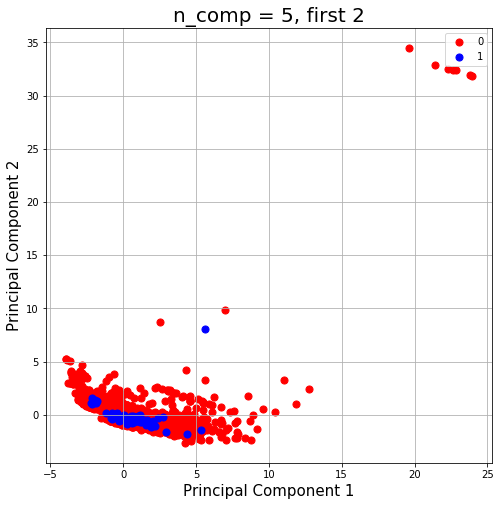

In [6]:
features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']

# Separating out the features
x = num_only_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

num_only_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = num_only_principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

num_only_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = num_only_pcaDf['is_violating'] == target
    ax.scatter(num_only_pcaDf.loc[indicesToKeep, 'principal component 1']
               , num_only_pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

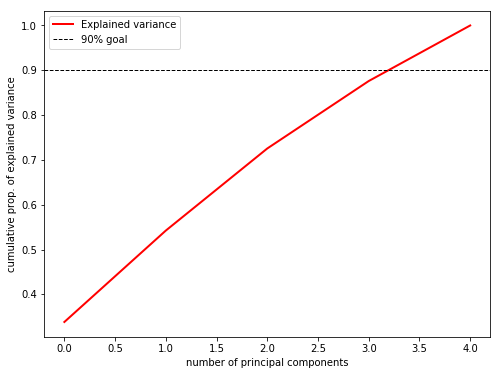

In [7]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [8]:
print(f'PCA explained variance is {pca.explained_variance_}')
print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

PCA explained variance is [4.26104911 2.56824573 2.30606727 1.89510325 1.56103292]

PCA explained variance ratio is [0.19364111 0.11671256 0.104798   0.08612196 0.07094031]


## KMeans - 10 clusters
#### Plot PCA, n_components = 5, plot first 2, all num_cat's

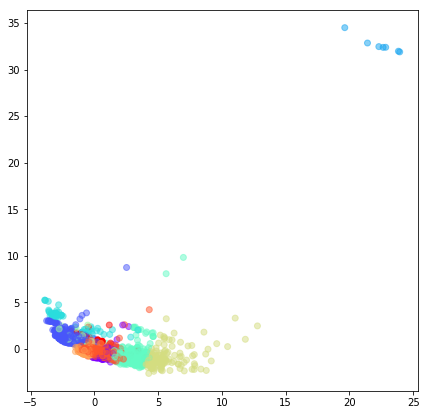

In [71]:
kmeans = KMeans(n_clusters=10)

X_clustered_num = kmeans.fit_predict(num_only_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(num_only_principalComponents[:,0],num_only_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.5) 


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


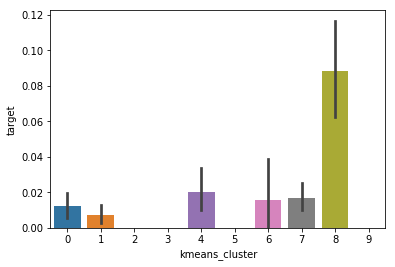

In [72]:
numkmeans = kmeans.labels_

kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4511)

num_KMeansDF = pd.DataFrame({'kmeans_cluster':numkmeans, 'target':kmeans_y})

sns.barplot(x='kmeans_cluster',y='target',data=num_KMeansDF)

In [63]:
num_8 = num_KMeansDF.loc[num_KMeansDF['kmeans_cluster'] == 4]
num_8.loc[2500:3000]

,kmeans_cluster,target
2536,4,0.0
2543,4,0.0
2788,4,0.0
2814,4,0.0
2987,4,0.0


In [70]:
df.loc[[2987]]

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,...,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,list_loc_denver,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,is_violating
2987,27289914,https://www.airbnb.com/rooms/27289914,::BOOK NOW SPOTS ARE FILLING UP FAST: Red rock...,.::IF BOOKING LONGER THAT TWO WEEKS PLEASE GET...,::BOOK NOW SPOTS ARE FILLING UP FAST: Red rock...,I do have a two year old son. Every one that h...,"Guest are able to use female dorm, kitchen and...",I am more than willing to give plenty of space...,COMMON HOUSE RULES 1. No guest that is not boo...,175151029,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0


## Plot PCA, n_components = 5, plot first 2, all num_cat's

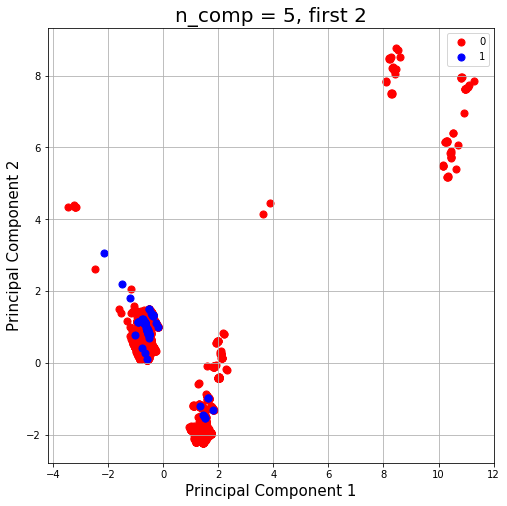

In [13]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the feature
x = few_categorical_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

few_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = few_principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

few_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = few_pcaDf['is_violating'] == target
    ax.scatter(few_pcaDf.loc[indicesToKeep, 'principal component 1']
               , few_pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

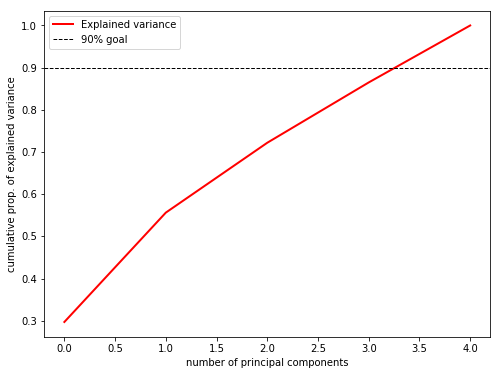

In [14]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [15]:
print(f'PCA explained variance is {pca.explained_variance_}')
print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

PCA explained variance is [2.21237596 1.92993254 1.23290343 1.06439845 1.00537038]

PCA explained variance ratio is [0.2010805  0.17540952 0.11205728 0.09674204 0.09137705]


## KMeans

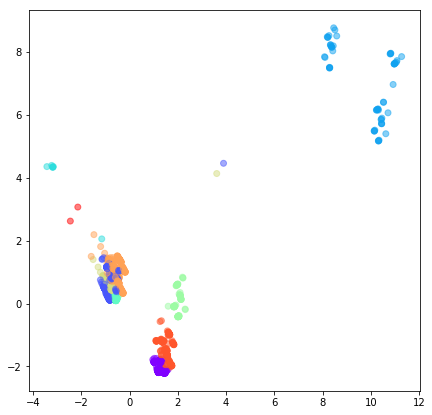

In [73]:
kmeans = KMeans(n_clusters=10)

X_clustered_num = kmeans.fit_predict(few_principalComponents)

# Plot the scatter diagram
plt.figure(figsize = (7,7))
plt.scatter(few_principalComponents[:,0],few_principalComponents[:,1], 
            c=kmeans.labels_,cmap='rainbow', alpha=0.5) 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


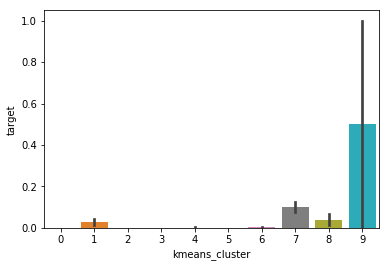

In [74]:
fewkmeans = kmeans.labels_

kmeans_y = y_target_vals
kmeans_y = kmeans_y.reshape(4511)

fewKMeansDF = pd.DataFrame({'kmeans_cluster':fewkmeans, 'target':kmeans_y})

sns.barplot(x='kmeans_cluster',y='target',data=fewKMeansDF)

In [76]:
few_9 = fewKMeansDF.loc[fewKMeansDF['kmeans_cluster'] == 9]
few_9.loc[1000:3000]

,kmeans_cluster,target
2275,9,0.0


In [52]:
df.loc[[2519]]

,kmeans_cluster,target
